# Supervised and Unsupervised Learning

Depending on the type of the data and the model to be built, you can separate the learning problems into two broad categories:

### Supervised learning. 
They are the methods in which the training set contains additional attributes that you want to predict (target). 
  ##### Classification: 
The data in the training set belong to two or more classes or categories; then, the data, already being labeled, allow us to teach the system to recognize the characteristics that distinguish each class. When you will need to consider a new value unknown to the system, the system will evaluate its class according to its characteristics.
 ###### Regression: 
When the value to be predicted is a continuous variable. The simplest case to understand is when you want to find the line which describes the trend from a series of points represented in a scatterplot.

### Unsupervised learning. 
These are the methods in which the training set consists of a series of input values x without any corresponding
target value.
 ##### Clustering: 
 The goal of these methods is to discover groups of similar examples in a dataset.
 ##### Dimensionality reduction: 
 Reduction of a high-dimensional dataset to one with only two or three dimensions is useful not just for data
visualization, but for converting data of very high dimensionality into data of much lower dimensionality such that each of the lower dimensions conveys much more information.

In addition to these two main categories, there is a further group of methods which have the purpose of validation and evaluation of the models.

# Training Set and Testing Set
Machine learning enables learning some properties by a model from a data set and applying them to new data. This is because a common practice in machine learning is to evaluate an algorithm. This valuation consists of splitting the data into two parts, one called the training set, with which we will learn the properties of the data, and the other called the testing set, on which to test these properties.

In [57]:
import pandas as pd
from sklearn import linear_model as lm
from sklearn.feature_selection import RFE #recursive feature elimination
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, 
mean_squared_error

print(os.getcwd())

os.chdir('C:\\Analytics\\Personal\\Machine Learning\\Training\\R\\Dataset')

C:\Analytics\Personal\Machine Learning\Training\R\Dataset


In [58]:
#Read the car price
df = pd.read_csv('carPrice.csv')


# View the first few rows
df.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
df.columns.values 

array(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

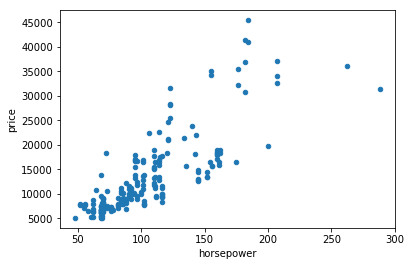

In [60]:
df.plot(x='horsepower', y='price', kind='scatter')

In [61]:
#Describe data

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
#create dummy variables for the column
dummy_cols = """carCompany fueltype aspiration doornumber carbody 
drivewheel enginelocation enginetype 
cylindernumber fuelsystem""".split()

dummies = pd.get_dummies(df[dummy_cols])

# Alternatively you can use sklearn package's LabelEncoder function
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [63]:
dummies.columns.values 

array(['carCompany_alfa-romero', 'carCompany_audi', 'carCompany_bmw',
       'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda',
       'carCompany_mercedes-benz', 'carCompany_mercury',
       'carCompany_mitsubishi', 'carCompany_nissan', 'carCompany_peugot',
       'carCompany_plymouth', 'carCompany_porsche', 'carCompany_renault',
       'carCompany_saab', 'carCompany_subaru', 'carCompany_toyota',
       'carCompany_volkswagen', 'carCompany_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv'

In [64]:
#drop the original column
df = df.drop(dummy_cols, axis=1)

In [65]:
df.columns.values 

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [66]:
#add dummy variables
df = df.join(dummies)

In [67]:
df.columns.values

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drive

In [68]:
#Break Data Up Into Training And Test Datasets

# Create our predictor/independent variable
# and our response/dependent variable

X = df.drop(['price','car_ID'],axis = 1)
y = df['price']

col = X.columns.values

In [69]:
#Normalizing the data

#A unit or scale of measurement for different variables varies, so an analysis with the raw measurement could 
#be artificially skewed toward the variables with higher absolute values. Bringing all the different types of 
#variable units in the same order of magnitude thus eliminates the potential outlier measurements that would 
#misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods 
#for rescaling data are normalization and standardization.

#Normalizing data can be achieved by Min-Max scaling
#The standardization technique will transform the variables to have a zero mean and standard deviation of one.

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

X = pd.DataFrame(X_std,columns = col)

#minmax_scale = preprocessing.MinMaxScaler().fit(X)
#X_minmax = minmax_scale.transform(X)

In [70]:
X.columns.values

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       

In [71]:
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [72]:
#Feature Construction or Generation

#Machine learning algorithms give best results only when we provide it the best possible features that 
#structure the underlying form of the problem that you are trying to address

#Correlation Matrix

corr = X.corr()
print(corr)

                          symboling  wheelbase  carlength  carwidth  \
symboling                  1.000000  -0.531954  -0.357612 -0.232919   
wheelbase                 -0.531954   1.000000   0.874587  0.795144   
carlength                 -0.357612   0.874587   1.000000  0.841118   
carwidth                  -0.232919   0.795144   0.841118  1.000000   
carheight                 -0.541038   0.589435   0.491029  0.279210   
curbweight                -0.227691   0.776386   0.877728  0.867032   
enginesize                -0.105790   0.569329   0.683360  0.735433   
boreratio                 -0.130051   0.488750   0.606454  0.559150   
stroke                    -0.008735   0.160959   0.129533  0.182942   
compressionratio          -0.178515   0.249786   0.158414  0.181129   
horsepower                 0.070873   0.353294   0.552623  0.640732   
peakrpm                    0.273606  -0.360469  -0.287242 -0.220012   
citympg                   -0.035823  -0.470414  -0.670909 -0.642704   
highwa

In [73]:
# Create our test data from the first 150 observations
X_train = X[0:150]
y_train = y[0:150]

# Create our training data from the remaining observations
X_test = X[150:]# Create an object that is an ols regression
y_test = y[150:]

In [74]:
X_test.columns.values 

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carCompany_alfa-romero', 'carCompany_audi',
       'carCompany_bmw', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercedes-benz',
       'carCompany_mercury', 'carCompany_mitsubishi', 'carCompany_nissan',
       'carCompany_peugot', 'carCompany_plymouth', 'carCompany_porsche',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       

In [75]:
#Train The Linear Model

# Create an object that is an ols regression
ols = lm.LinearRegression()

In [76]:
# Train the model using our training data
model = ols.fit(X_train, y_train)

In [77]:
model.intercept_

78646375710830.203

In [78]:
# View the training model's coefficient
model.coef_

array([  2.46679194e+02,   1.09237073e+03,  -1.20609843e+03,
         6.44224913e+02,  -3.19309767e+01,   4.39516251e+03,
         3.40345159e+03,  -9.64379197e+02,  -5.79791584e+01,
         5.24699050e+03,   2.17271472e+03,   1.57384347e+03,
         1.40266136e+00,   1.43598343e+03,  -4.15943689e+13,
        -6.29042288e+13,  -6.70774175e+13,  -4.15943689e+13,
        -7.09655409e+13,  -8.44151735e+13,  -4.79100089e+13,
        -4.15943689e+13,  -9.55216053e+13,  -6.70774175e+13,
        -2.41331110e+13,  -8.44151735e+13,  -9.80291604e+13,
        -3.60565406e+14,  -6.29042288e+13,  -5.34316059e+13,
        -3.40456197e+13,  -5.83848798e+13,   9.64955443e+13,
         2.25768219e+12,  -1.59800249e+13,  -4.73334748e+13,
        -8.80660070e+13,   1.00916107e+14,  -7.27397047e+13,
        -7.27397047e+13,   1.63007904e+13,   1.63007904e+13,
        -2.23461170e+13,  -2.56730822e+13,  -6.28659971e+13,
        -6.61528821e+13,  -4.33816595e+13,   9.93028889e+13,
         2.38788099e+14,

### How Good Is Your Model?
There are three metrics widely used for evaluating linear model performance.
#R-squared
#RMSE
#MAE


The R-squared metric is the most popular practice of evaluating how well your model fits the data. R-squared value designates the total proportion of variance in the dependent variable explained by the independent variable. It is a value between 0 and 1; the value toward 1 indicates a better model fit

In [56]:
# Run the model on X_test and show the first five results
list(model.predict(X_test)[0:5])

[352599830437803.13,
 352599830438058.69,
 352599830437427.94,
 352599830438525.38,
 352599830438185.31]

In [79]:
# View the R-Squared score

Price_Pred = model.predict(X_test)
r2_score(Price_Pred, y_test)

-12.23540675273656

In [80]:
# View the first five test Y values
list(y_test)[0:5]

[5348.0, 6338.0, 6488.0, 6918.0, 7898.0]

In [81]:
#The difference between the model’s predicted values and the actual values is how is we judge as model’s 
#accuracy, because a perfectly accurate model would have residuals of zero.

#The most common statistic used for quantitative Ys is the residual sum of squares

# Apply the model we created using the training data 
# to the test data, and calculate the RSS.
((y_test - model.predict(X_test)) **2).sum()

5.112358972390869e+30

In [82]:
#Note: You can also use Mean Squared Error, which is RSS divided by the degrees of freedom

# Calculate the MSE
np.mean((model.predict(X_test) - y_test) **2)

9.295198131619762e+28